# HW0 - Hello Vision World

In this HW you'll get acquainted with OpenCV in a Python-Jupyter environment.

If you're able to read this you were probably successfull at creating a Python-Jupyter environment.

Next we will import OpenCV, which is called `cv2` (that's the name of the OpenCV module) in python.

In [250]:
import cv2
import numpy as np

If that executed without an error - you were also able to install OpenCV.

If that didn't run, try running `pip install opencv-python` or `apt-get install python-opencv` on ubuntu.

Next we will load a test image from scikit-image (`skimage`).

In [251]:
import skimage.data

In [252]:
image = skimage.data.astronaut()

An image is an array of pixels. It has HxWxC shape: (we can interrogate an image for its shape using `.shape`)

In [253]:
image.shape

(512, 512, 3)

This image has Height and Width of 512, and 3 channels: Red, Green, Blue

The channels are the last dimension, meaning the image is stored in memory where every pixel has 3 components, like so: RGB, RGB, RGB, RGB, ...

In [254]:
image[0,0]

array([154, 147, 151], dtype=uint8)

The first pixel in the image has the RGB code: `(154, 147, 151)`, which is kind of a grayish color.

Let's plot out a small patch of the image (10x10 pixels top-left):

In [255]:
import matplotlib.pyplot as plt
%matplotlib inline

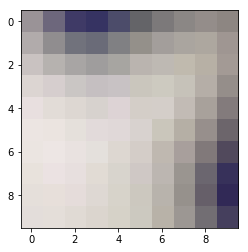

In [256]:
plt.imshow(image[0:10,0:10])

We can do many things with images, such as make them grayscale:

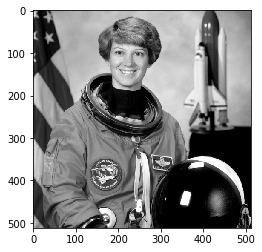

In [257]:
plt.imshow(cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY), cmap='gray')

By default images have values \[0,255\] and their pixels are stored in `uint8` (bytes, unsigned chars)

In [258]:
image.dtype

dtype('uint8')

But we can change that easily, say to 32-bit floating point (e.g. `float32`):

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


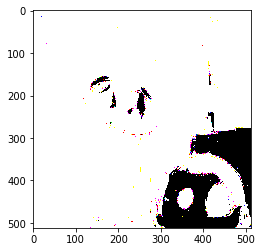

In [259]:
plt.imshow(image.astype(np.float32))

Ah, Matplotlib is complaining that floating point images are usually in range of \[0,1\] and not \[0,255\] like `uint8`s.

So we can easily divide the values element-wise:

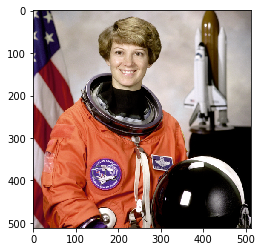

In [260]:
plt.imshow(image.astype(np.float32) / 255.)

Now it looks the same as before.

We can also flip images in different directions:

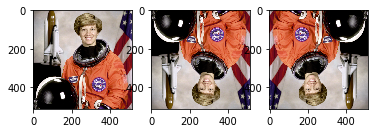

In [261]:
plt.subplot(1,3,1),plt.imshow(cv2.flip(image.copy(), 1))
plt.subplot(1,3,2),plt.imshow(cv2.flip(image.copy(), -1))
plt.subplot(1,3,3),plt.imshow(cv2.flip(image.copy(), 0));

We can blur them:

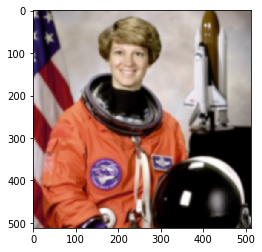

In [262]:
plt.imshow(cv2.GaussianBlur(image.copy(), ksize=(11,11), sigmaX=-1))

---
---

## Here comes your part

<img src="http://thuglifememe.com/wp-content/uploads/2017/08/22-you-got-this-meme-9.jpg"/>

### Image blur

1) Load the astronaut image to a variable, convert to grayscale and convert to a [0,1] floating point.

2) Blur it with a 11x11 **Box filter** (`cv2.boxFilter`), and a 11x11 **Gaussian filter**

3) Subtract the blurred images from the original

4) Show the results to the notebook (`plt.imshow(...)`) side-by-side (`plt.subplot(1,2,1)`), with a colorbar (`plt.colorbar()`)

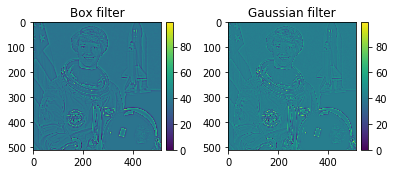

In [263]:
# TODO: your code here
variable = skimage.data.astronaut()

gray=cv2.cvtColor(variable.copy(), cv2.COLOR_RGB2GRAY)
gray=gray.astype(np.float32) / 255.

gray_box = cv2.boxFilter(gray.copy(),-1,(11,11))
gray_gaussian=cv2.GaussianBlur(gray.copy(),(11,11),0)

sub_box= gray-gray_box
sub_gaussian = gray-gray_gaussian


plt.subplot(1,2,1),plt.imshow(sub_box.copy())
plt.gca().set_title('Box filter')
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.subplot(1,2,2),plt.imshow(sub_gaussian.copy())
plt.gca().set_title('Gaussian filter')
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)

See how subtracting the blur (low frequencies) from the original has left only the edges (high frequencies).

Try different kernel sizes to see the effect on the edges.

### Colorspaces

1) Load the astronaut image (RGB)

2) Convert to HSV (`cv2.cvtColor`)

3) Display the H, S and V components, side-by-side

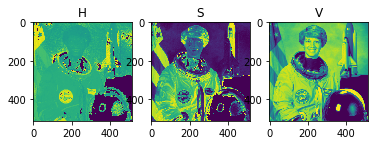

In [264]:
# TODO: your code here
hsv=cv2.cvtColor(variable.copy(),cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
h, s, v = hsv[:, :, 0], hsv[:, :, 1], hsv[:, :, 2]
plt.subplot(1,3,1),plt.imshow(h)
plt.gca().set_title('H')
plt.subplot(1,3,2),plt.imshow(s)
plt.gca().set_title('S')
plt.subplot(1,3,3),plt.imshow(v)
plt.gca().set_title('V');

### 3D Projection

Consider a group of 3D points. 

We have a 100 uniformly distributed points in a volume XYZ: \[-5,5\],\[-5,5\],\[5,100\] (the units are, say, meters).

Some points are close to us (the camera at `(0,0,0)`), they have low Z values, and some are farther away.

In [265]:
pts3d = np.hstack([np.random.uniform(-5,5,(1000,2)),np.random.uniform(5,100,(1000,1))])[:,np.newaxis,:]

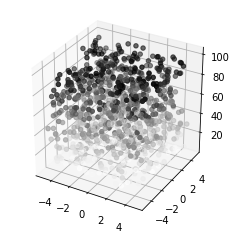

In [266]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pts3d[:,0,0],pts3d[:,0,1],pts3d[:,0,2],c=-pts3d[:,0,2],cmap='gray');
ax.set_aspect('equal');

You're given the following intrinsics matrix (`K`):

In [267]:
K = np.array([[800,0,320],[0,800,240],[0,0,1]], dtype=np.float32)

Calculate the 2D projection of the 3D points on the image plane, and plot them (`plt.scatter`).

Try doing the calculation yourself, using matrix multiplication for the entire group, and also using `cv2.projectPoints`.

Try changing the `K` matrix focal length parameters to see how it affects the projection.

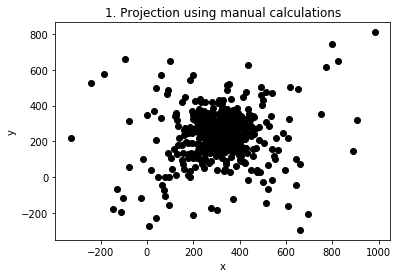

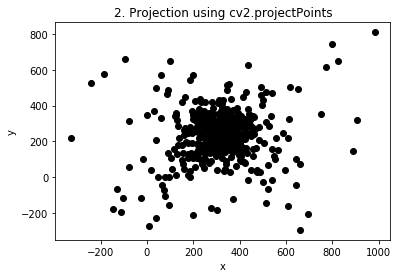

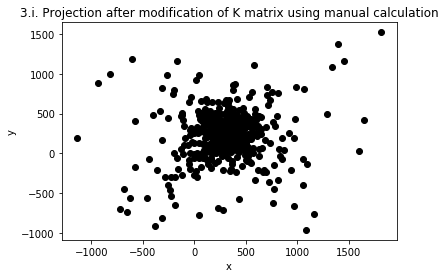

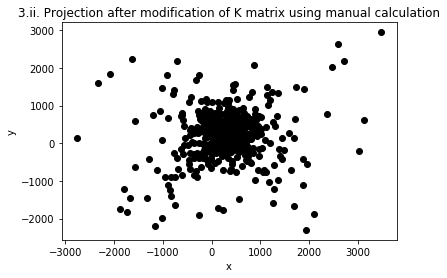

In [268]:
# TODO: your code here
#Parameter passed are 3D object points, K(intrinsic matrix) and graph title
def manual_calculation(pts3d,K,title):
    #K is intrinsic matrix
    #Defining extrinsic matrix
    extrinsic_matrix=np.matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0]])
    #Matrix multiplication of instrinsic and extrinsic matrix
    P=np.matmul(K,extrinsic)

    #pts2d is the array that will contain the projected 2d points
    pts2d=[]

    #Taking the homogenous form of pts3d
    pts3d_homogenous=cv2.convertPointsToHomogeneous(pts3d)


    for i in pts3d_homogenous:
        A=np.matmul(P,i.T)
        if len(pts2d)==0:
            pts2d=[[A[0][0],A[1][0],A[2][0]]]
        else:
            pts2d.append([A[0][0],A[1][0],A[2][0]])       
    pts2d=np.array(pts2d)

    #Dividing by the scaling factor as the last step
    for i in pts2d:
        i[0]=i[0]/i[2]
        i[1]=i[1]/i[2]

    #Discarding the third dimension
    pts2d=np.delete(pts2d,[2],axis=1)
    
    
    X=pts2d[:,0]
    Y=pts2d[:,1]
    plt.scatter(X,Y,label='Solution',color='k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()
    
    
#Parameter passed are 3D object points, K(intrinsic matrix) and graph title
def projectPointsCalculation(pts3d,K,title):
    rvec=cv2.Rodrigues(np.identity(3))[0]
    tvec=np.matrix([0,0,0],dtype=np.float32)
    pts2d_cv=cv2.projectPoints(pts3d,rvec,tvec,K,None)[0]
    X=[]
    Y=[]
    for i in pts2d_cv:
        X.append(i[0][0])
        Y.append(i[0][1])
    plt.scatter(X,Y,label='Solution',color='k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()


#1. Plotting the scatter plot using manual calculation   
manual_calculation(pts3d,K,'1. Projection using manual calculations')

#2. Plotting the scatter plot using cv2.projectPoints, the result is same as manual calculation.
projectPointsCalculation(pts3d,K,'2. Projection using cv2.projectPoints')


#3. Plotting the scatter plot after varying focal length parameters in K matrix:
#i. Modification: f_x=1800, f_y=1800
K = np.array([[1800,0,320],[0,1800,240],[0,0,1]], dtype=np.float32)
manual_calculation(pts3d,K,'3.i. Projection after modification of K matrix using manual calculation')

#ii. Modification: f_x=3800, f_y=3800
K = np.array([[3800,0,320],[0,3800,240],[0,0,1]], dtype=np.float32)
manual_calculation(pts3d,K,'3.ii. Projection after modification of K matrix using manual calculation')

#Restoring original value of K
K = np.array([[800,0,320],[0,800,240],[0,0,1]], dtype=np.float32)

Consider a 3D cube:

In [269]:
# cube veritces
Z = np.array([[-1,-1,-1],[1,-1,-1],[1,1,-1],[-1,1,-1],[-1,-1,1],[1,-1,1],[1,1,1],[-1,1,1]])
Z[:,2] += 10 # translate on Z
Z[:,0] += 2  # translate on X
# list of faces
faces = [[Z[0],Z[1],Z[2],Z[3]],
         [Z[4],Z[5],Z[6],Z[7]], 
         [Z[0],Z[1],Z[5],Z[4]], 
         [Z[2],Z[3],Z[7],Z[6]], 
         [Z[1],Z[2],Z[6],Z[5]],
         [Z[4],Z[7],Z[3],Z[0]]]

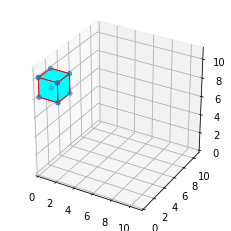

In [270]:
# Plot the cube in 3D
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.75))
ax.scatter(Z[:,0], Z[:,1], Z[:,2])
ax.set_xlim(0,11), ax.set_ylim(0,11), ax.set_zlim(0,11)
ax.set_aspect('equal') # uniform scale axes

Use the same method from before to project the 3D points to 2D

In [271]:
pts2d = None # TODO: your code here

#Performing manual calculation for obtaining 2D projected points same as before


#K is intrinsic matrix
#Defining extrinsic matrix
extrinsic_matrix=np.matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0]])
#Matrix multiplication of instrinsic and extrinsic matrix
P=np.matmul(K,extrinsic)

Z_homogenous=cv2.convertPointsToHomogeneous(Z)
for i in Z_homogenous:
    A=np.matmul(P,i.T)
    if pts2d is None:
        pts2d=[[float(A[0][0]),float(A[1][0]),float(A[2][0])]]
    else:
        pts2d.append([float(A[0][0]),float(A[1][0]),float(A[2][0])])       

#Division by the scaling factor
for i in pts2d:
    i[0]=i[0]/i[2]
    i[1]=i[1]/i[2]
    i[2]=i[2]/i[2]

pts2d=np.delete(pts2d,[2],axis=1)
pts2d=np.expand_dims(pts2d, axis=1)

In [272]:
# list of 2D faces
faces2d = [[pts2d[0],pts2d[1],pts2d[2],pts2d[3]],
           [pts2d[4],pts2d[5],pts2d[6],pts2d[7]], 
           [pts2d[0],pts2d[1],pts2d[5],pts2d[4]], 
           [pts2d[2],pts2d[3],pts2d[7],pts2d[6]], 
           [pts2d[1],pts2d[2],pts2d[6],pts2d[5]],
           [pts2d[4],pts2d[7],pts2d[3],pts2d[0]]]

Now we can plot the cube projected on our 2D image:

(0, 480)

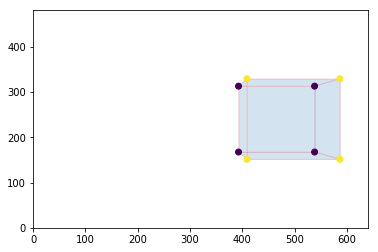

In [273]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
patches = []
for p in np.array(faces2d):
    patches += [Polygon(np.squeeze(p), True)]

fig=plt.figure()
ax = fig.add_subplot(111)
ax.add_collection(PatchCollection(patches, alpha=0.1, linewidths=1, edgecolors='r'))
ax.scatter(pts2d[:,0,0],pts2d[:,0,1],c=-Z[:,2])
ax.set_xlim(0,640)
ax.set_ylim(0,480)

Try to change the translation of the 3D points, as well as the K matrix, and see how it affects the 2D projection.